# Tugas Pertemuan 2 - Pre-Processing Data dengan TF-IDF

# Mengakses file di Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Membaca dataset
*   pandas digunakan untuk membaca file CSV ke dalam DataFrame.
*   df.head(6) menampilkan enam baris pertama dataset.


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/PPW-A/report/Tugas-PPW-A/data_berita_detik.csv")
df.head(6)

,judul,tanggal,isi_berita,kategori
0,Jorge Martin Bisa Saingi Bagnaia-Marc Marquez ...,"Kamis, 28 Nov 2024 17:50 WIB","Jorge Martin mengatakan, Francesco Bagnaia dan...",Olahraga
1,Tiwi Tak Ingin Sia-Siakan Kesempatan Main di W...,"Kamis, 28 Nov 2024 12:30 WIB",Pebulutangkis ganda putri Amallia Cahaya Prati...,Olahraga
2,"Daftar Atlet BWF World Tour Finals 2024, 6 Wak...","Rabu, 27 Nov 2024 18:50 WIB",Kejuaraan bulutangkis BWF World Tour Finals 20...,Olahraga
3,"Performanya Terus Menanjak, Putri KW Bungkam K...","Rabu, 27 Nov 2024 17:20 WIB",Putri Kusuma Wardani sempat dapat banyak kriti...,Olahraga
4,Marc Marquez Sukses Usir Hantu,"Rabu, 27 Nov 2024 16:15 WIB","Semusim di tim Gresini, Marc Marquez berhasil ...",Olahraga
5,"Tersandung Pemerkosaan, Karier Conor McGregor ...","Rabu, 27 Nov 2024 15:15 WIB",Conor McGregor tersandung kasus pemerkosaan. D...,Olahraga


**CLEANING**


---



**Cleaning Data** adalah proses pemrosesan teks awal  yang bertujuan untuk membersihkan  data  teks dari elemen yang tidak perlu atau mengganggu, seperti:
- Tanda baca
(punctuation) titik, koma, tanda seru
- Tag
- URL
- Simbol-simbol
- Emoticon
- Angka random

In [ ]:
import re
import string
import nltk

#Menghapus URL menggunakan ekspresi reguler (re). URL diganti dengan string kosong ('').
def remove_url(ulasan):
  url = re.compile(r'https?://\S+|www\.S+')
  return url.sub(r'', ulasan)

#Menghapus elemen HTML menggunakan ekspresi reguler.
def remove_html(ulasan):
  html = re.compile(r'<.#?>')
  return html.sub(r'', ulasan)

#Menghapus emoji dari teks menggunakan rentang Unicode.
def remove_emoji(ulasan):
  emoji_pattern = re.compile("["
      u"\U0001F600-\U0001F64F"
      u"\U0001F300-\U0001F5FF"
      u"\U0001F680-\U0001F6FF"
      u"\U0001F1E0-\U0001F1FF""]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', ulasan)

#Menghapus angka dari teks.
def remove_numbers(ulasan):
  ulasan = re.sub(r'\d+', '', ulasan)
  return ulasan

#Menghapus simbol dan karakter non-alfanumerik lainnya.
def remove_symbols(ulasan):
  ulasan = re.sub(r'[^a-zA-Z0-9\s]', '', ulasan) #menghapus semua simbol
  return ulasan

#Menggabungkan Semua Langkah
df['berita_clean'] = df['isi_berita'].apply(lambda x: remove_url(x))
df['berita_clean'] = df['berita_clean'].apply(lambda x: remove_html(x))
df['berita_clean'] = df['berita_clean'].apply(lambda x: remove_emoji(x))
df['berita_clean'] = df['berita_clean'].apply(lambda x: remove_symbols(x))
df['berita_clean'] = df['berita_clean'].apply(lambda x: remove_numbers(x))

df.head(6)

,judul,tanggal,isi_berita,kategori,berita_clean
0,Jorge Martin Bisa Saingi Bagnaia-Marc Marquez ...,"Kamis, 28 Nov 2024 17:50 WIB","Jorge Martin mengatakan, Francesco Bagnaia dan...",Olahraga,Jorge Martin mengatakan Francesco Bagnaia dan ...
1,Tiwi Tak Ingin Sia-Siakan Kesempatan Main di W...,"Kamis, 28 Nov 2024 12:30 WIB",Pebulutangkis ganda putri Amallia Cahaya Prati...,Olahraga,Pebulutangkis ganda putri Amallia Cahaya Prati...
2,"Daftar Atlet BWF World Tour Finals 2024, 6 Wak...","Rabu, 27 Nov 2024 18:50 WIB",Kejuaraan bulutangkis BWF World Tour Finals 20...,Olahraga,Kejuaraan bulutangkis BWF World Tour Finals a...
3,"Performanya Terus Menanjak, Putri KW Bungkam K...","Rabu, 27 Nov 2024 17:20 WIB",Putri Kusuma Wardani sempat dapat banyak kriti...,Olahraga,Putri Kusuma Wardani sempat dapat banyak kriti...
4,Marc Marquez Sukses Usir Hantu,"Rabu, 27 Nov 2024 16:15 WIB","Semusim di tim Gresini, Marc Marquez berhasil ...",Olahraga,Semusim di tim Gresini Marc Marquez berhasil m...
5,"Tersandung Pemerkosaan, Karier Conor McGregor ...","Rabu, 27 Nov 2024 15:15 WIB",Conor McGregor tersandung kasus pemerkosaan. D...,Olahraga,Conor McGregor tersandung kasus pemerkosaan Di...


**CASE FOLDING**


---



**Casefolding** adalah langkah prapemrosesan yang mencakup mengubah semua karakter dalam teks menjadi huruf kecil. Tujuan dari casefolding adalah
adalah  untuk menghilangkan ambiguitas yang mungkin timbul akibat perbedaan huruf besar  dan kecil.
Misalnya, kata yang sama tetapi ditulis dengan huruf besar atau kecil akan  dianggap sebagai entitas yang berbeda.

In [ ]:
#Mengubah semua huruf menjadi huruf kecil untuk menyamakan bentuk kata.
def case_folding(text):
    if isinstance(text, str):
      lowercase_text = text.lower()
      return lowercase_text
    else :
      return text

df ['case_folding'] = df['berita_clean'].apply(case_folding)

df.head(6)

,judul,tanggal,isi_berita,kategori,berita_clean,case_folding
0,Jorge Martin Bisa Saingi Bagnaia-Marc Marquez ...,"Kamis, 28 Nov 2024 17:50 WIB","Jorge Martin mengatakan, Francesco Bagnaia dan...",Olahraga,Jorge Martin mengatakan Francesco Bagnaia dan ...,jorge martin mengatakan francesco bagnaia dan ...
1,Tiwi Tak Ingin Sia-Siakan Kesempatan Main di W...,"Kamis, 28 Nov 2024 12:30 WIB",Pebulutangkis ganda putri Amallia Cahaya Prati...,Olahraga,Pebulutangkis ganda putri Amallia Cahaya Prati...,pebulutangkis ganda putri amallia cahaya prati...
2,"Daftar Atlet BWF World Tour Finals 2024, 6 Wak...","Rabu, 27 Nov 2024 18:50 WIB",Kejuaraan bulutangkis BWF World Tour Finals 20...,Olahraga,Kejuaraan bulutangkis BWF World Tour Finals a...,kejuaraan bulutangkis bwf world tour finals a...
3,"Performanya Terus Menanjak, Putri KW Bungkam K...","Rabu, 27 Nov 2024 17:20 WIB",Putri Kusuma Wardani sempat dapat banyak kriti...,Olahraga,Putri Kusuma Wardani sempat dapat banyak kriti...,putri kusuma wardani sempat dapat banyak kriti...
4,Marc Marquez Sukses Usir Hantu,"Rabu, 27 Nov 2024 16:15 WIB","Semusim di tim Gresini, Marc Marquez berhasil ...",Olahraga,Semusim di tim Gresini Marc Marquez berhasil m...,semusim di tim gresini marc marquez berhasil m...
5,"Tersandung Pemerkosaan, Karier Conor McGregor ...","Rabu, 27 Nov 2024 15:15 WIB",Conor McGregor tersandung kasus pemerkosaan. D...,Olahraga,Conor McGregor tersandung kasus pemerkosaan Di...,conor mcgregor tersandung kasus pemerkosaan di...


**TOKENIZATION**


---



**Tokenization atau Tokenisasi** Tujuannya adalah untuk mengelompokkan kemunculan  kata dalam proses berikut.
Lebih jelasnya untuk memecah teks menjadi unit terkecil yang dapat
berupa kata,frasa atau karakter terpisah.

In [ ]:
#Memecah teks menjadi kata-kata individu (token)
from nltk.tokenize import word_tokenize
def tokenize(text):
    tokens = text.split()
    return tokens

df['tokenize'] = df['case_folding'].apply(tokenize)

df.head(6)

,judul,tanggal,isi_berita,kategori,berita_clean,case_folding,tokenize
0,Jorge Martin Bisa Saingi Bagnaia-Marc Marquez ...,"Kamis, 28 Nov 2024 17:50 WIB","Jorge Martin mengatakan, Francesco Bagnaia dan...",Olahraga,Jorge Martin mengatakan Francesco Bagnaia dan ...,jorge martin mengatakan francesco bagnaia dan ...,"[jorge, martin, mengatakan, francesco, bagnaia..."
1,Tiwi Tak Ingin Sia-Siakan Kesempatan Main di W...,"Kamis, 28 Nov 2024 12:30 WIB",Pebulutangkis ganda putri Amallia Cahaya Prati...,Olahraga,Pebulutangkis ganda putri Amallia Cahaya Prati...,pebulutangkis ganda putri amallia cahaya prati...,"[pebulutangkis, ganda, putri, amallia, cahaya,..."
2,"Daftar Atlet BWF World Tour Finals 2024, 6 Wak...","Rabu, 27 Nov 2024 18:50 WIB",Kejuaraan bulutangkis BWF World Tour Finals 20...,Olahraga,Kejuaraan bulutangkis BWF World Tour Finals a...,kejuaraan bulutangkis bwf world tour finals a...,"[kejuaraan, bulutangkis, bwf, world, tour, fin..."
3,"Performanya Terus Menanjak, Putri KW Bungkam K...","Rabu, 27 Nov 2024 17:20 WIB",Putri Kusuma Wardani sempat dapat banyak kriti...,Olahraga,Putri Kusuma Wardani sempat dapat banyak kriti...,putri kusuma wardani sempat dapat banyak kriti...,"[putri, kusuma, wardani, sempat, dapat, banyak..."
4,Marc Marquez Sukses Usir Hantu,"Rabu, 27 Nov 2024 16:15 WIB","Semusim di tim Gresini, Marc Marquez berhasil ...",Olahraga,Semusim di tim Gresini Marc Marquez berhasil m...,semusim di tim gresini marc marquez berhasil m...,"[semusim, di, tim, gresini, marc, marquez, ber..."
5,"Tersandung Pemerkosaan, Karier Conor McGregor ...","Rabu, 27 Nov 2024 15:15 WIB",Conor McGregor tersandung kasus pemerkosaan. D...,Olahraga,Conor McGregor tersandung kasus pemerkosaan Di...,conor mcgregor tersandung kasus pemerkosaan di...,"[conor, mcgregor, tersandung, kasus, pemerkosa..."


**FILTERING/STOPWORD REMOVAL**


---



Tahap **Stopword Removal** yaitu langkah untuk memilih kata-kata yang  dianggap tidak penting atau  tidak relevan, untuk mengetahui kata-kata mana yang tidak relevan berdasarkan daftar stopword removal yang digunakan.



In [ ]:
#Menghapus kata-kata tidak penting (stopwords) berdasarkan daftar stopwords bahasa Indonesia dari pustaka NLTK.
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!




*   Pada tahap ini menggunakan library
NLTK stopword removal bahasa indonesia.Contoh stopwords dalam bahasa Indonesia adalah “yang” , “bahwa”, “itu”, ”ini”, “dengan” dan sebagainya.
*   Menghapus kata-kata tidak penting (stopwords)




In [ ]:
def remove_stopwords(text):
  return [word for word in text if word not in stop_words]

df['stopword_removal'] = df['tokenize'].apply(lambda x: ' '.join(remove_stopwords(x)))

df.head(6)

,judul,tanggal,isi_berita,kategori,berita_clean,case_folding,tokenize,stopword_removal
0,Jorge Martin Bisa Saingi Bagnaia-Marc Marquez ...,"Kamis, 28 Nov 2024 17:50 WIB","Jorge Martin mengatakan, Francesco Bagnaia dan...",Olahraga,Jorge Martin mengatakan Francesco Bagnaia dan ...,jorge martin mengatakan francesco bagnaia dan ...,"[jorge, martin, mengatakan, francesco, bagnaia...",jorge martin francesco bagnaia marc marquez fa...
1,Tiwi Tak Ingin Sia-Siakan Kesempatan Main di W...,"Kamis, 28 Nov 2024 12:30 WIB",Pebulutangkis ganda putri Amallia Cahaya Prati...,Olahraga,Pebulutangkis ganda putri Amallia Cahaya Prati...,pebulutangkis ganda putri amallia cahaya prati...,"[pebulutangkis, ganda, putri, amallia, cahaya,...",pebulutangkis ganda putri amallia cahaya prati...
2,"Daftar Atlet BWF World Tour Finals 2024, 6 Wak...","Rabu, 27 Nov 2024 18:50 WIB",Kejuaraan bulutangkis BWF World Tour Finals 20...,Olahraga,Kejuaraan bulutangkis BWF World Tour Finals a...,kejuaraan bulutangkis bwf world tour finals a...,"[kejuaraan, bulutangkis, bwf, world, tour, fin...",kejuaraan bulutangkis bwf world tour finals ha...
3,"Performanya Terus Menanjak, Putri KW Bungkam K...","Rabu, 27 Nov 2024 17:20 WIB",Putri Kusuma Wardani sempat dapat banyak kriti...,Olahraga,Putri Kusuma Wardani sempat dapat banyak kriti...,putri kusuma wardani sempat dapat banyak kriti...,"[putri, kusuma, wardani, sempat, dapat, banyak...",putri kusuma wardani kritik sukses membungkamn...
4,Marc Marquez Sukses Usir Hantu,"Rabu, 27 Nov 2024 16:15 WIB","Semusim di tim Gresini, Marc Marquez berhasil ...",Olahraga,Semusim di tim Gresini Marc Marquez berhasil m...,semusim di tim gresini marc marquez berhasil m...,"[semusim, di, tim, gresini, marc, marquez, ber...",semusim tim gresini marc marquez berhasil meng...
5,"Tersandung Pemerkosaan, Karier Conor McGregor ...","Rabu, 27 Nov 2024 15:15 WIB",Conor McGregor tersandung kasus pemerkosaan. D...,Olahraga,Conor McGregor tersandung kasus pemerkosaan Di...,conor mcgregor tersandung kasus pemerkosaan di...,"[conor, mcgregor, tersandung, kasus, pemerkosa...",conor mcgregor tersandung pemerkosaan dinilai ...


In [ ]:
df.to_csv("/content/drive/My Drive/PPW-A/report/Tugas-PPW-A/hasil_preprocesing.csv",encoding='utf8', index=False)

---

**TERM FREQUENCY AND INVERSE DOCUMENT FREQUNENCY (TF-IDF)**

---

# TF-IDF
Konsep


*   TF (Term Frequency): Mengukur frekuensi sebuah kata dalam dokumen.
*   IDF (Inverse Document Frequency): Mengukur seberapa jarang sebuah kata muncul dalam semua dokumen.



In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/My Drive/PPW-A/report/Tugas-PPW-A/hasil_preprocesing.csv", sep=",")

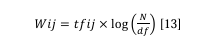

Keterangan :
- 𝑓𝑖,𝑗 : jumlah kata i muncul dalam dokumen j
- 𝑓𝑖 : jumlah dokumen yang mengandung I
- N : total seluruh dokumen.

# Kode Implementasi


*   TfidfVectorizer menghitung nilai TF-IDF untuk setiap kata dalam dokumen.
*   fit_transform mengubah teks menjadi matriks TF-IDF.

*   Matriks hasil diubah menjadi DataFrame dengan kolom sesuai kata-kata unik.






In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Menginisialisasi TfidfVectorizer tanpa max_features dan stop_words
vectorizer = TfidfVectorizer()

# Menghitung TF-IDF untuk kolom 'isi' dari dataframe
tfidf_matrix = vectorizer.fit_transform(df['stopword_removal'])

In [ ]:
# Mengubah hasilnya menjadi DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df.head(10)

,aaron,abhiram,abraham,absen,acara,aci,acungi,adakah,adangan,adelia,...,yuni,yunus,yunyu,yusuf,zac,zaman,zat,zero,zita,zoom
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.050513,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.068467,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0



*   Output akhir tfidf_df menampilkan representasi dokumen berupa vektor dengan nilai TF-IDF masing-masing kata.

1.   Baris (rows)
*   Setiap baris merepresentasikan satu dokumen (atau artikel) dalam dataset Anda.
*   Misalnya, baris ke-0 adalah dokumen pertama, baris ke-1 adalah dokumen kedua, dan seterusnya.

2.   Kolom (Columns):
*   Setiap kolom adalah kata unik (term) yang muncul dalam keseluruhan dataset setelah proses preprocessing (seperti stopword removal dan tokenization).
*   Contoh kata di kolom adalah aaron, abraham, absen, dll.







Ukuran matriks **TF-IDF** ditentukan oleh:

1. **Jumlah Berita**: Setelah diproses menjadi matriks TF-IDF, jumlah berita sama dengan jumlah baris dalam matriks. Pada gambar, terdapat **10 berita** (baris).

2. **Jumlah Fitur**: Fitur adalah jumlah kata unik (vocabulary) yang digunakan sebagai kolom dalam matriks TF-IDF. Pada gambar, terdapat **4458 fitur** (kolom).

Jadi, setelah diproses menjadi TF-IDF:
- **Berita (Dokumen)**: 10
- **Fitur (Kata Unik)**: 4458